In [7]:
import cv2
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 利用numpydefromfile函数读取raw文件，并指定数据格式
#扫描数据具有1000X1000X1000的像素
#将其分割100X100X100的1000份
imgData = np.fromfile('C:/Users/Administrator/Desktop/rock/Bentheimer_1000c_3p0035um.raw', dtype=np.ubyte)
#imgData.shape
img=imgData.reshape(1000,1000,1000)

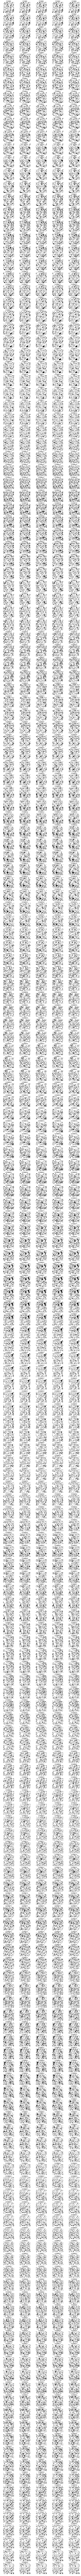

In [59]:
plt.figure(figsize=(15,500))
for i in range(0,1000):
    plt.subplot(200,5,i+1) 
    plt.title("CT扫描图"+str(i))
    plt.imshow(img[:][:][i],cmap=plt.cm.gray)
    plt.axis('off')  
plt.show()

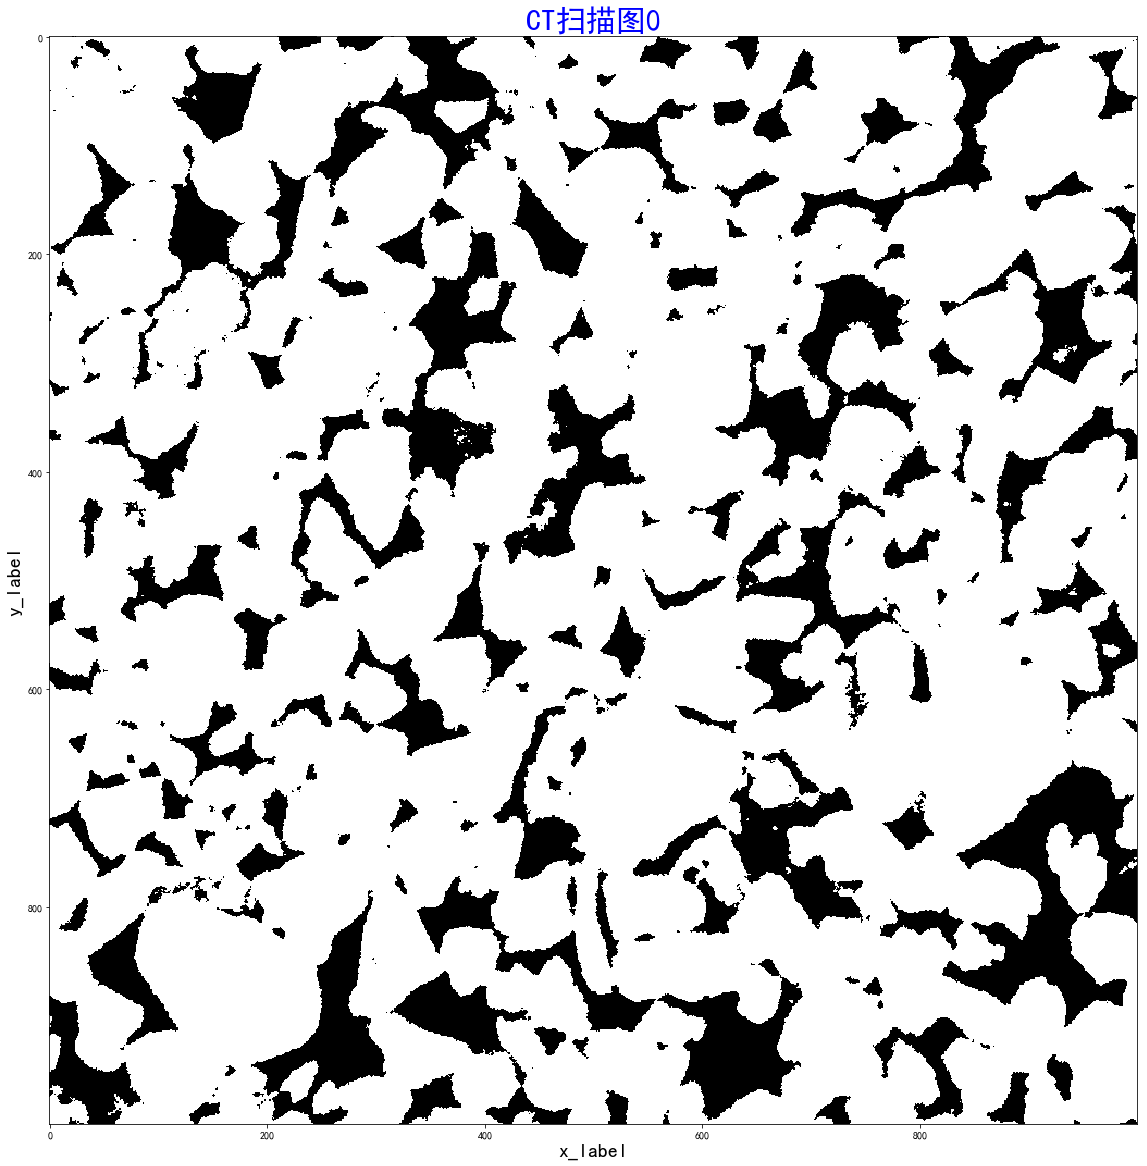

In [67]:
#显示其中的一张，分割成100份
plt.figure(figsize=(20,20))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.imshow(img[:][:][0],cmap=plt.cm.gray)
#plt.imshow(img[:,:,0],cmap=plt.cm.gray)
#plt.axis('off')  # clear x- and y-axes
plt.xlabel('x_label',fontsize=20,color='k')
plt.ylabel('y_label',fontsize=20,color='k')
#ax.set_title('title test',fontsize=12,color='r')
plt.title("CT扫描图0",fontsize=30,color='b')
plt.show()
#img[:][:][0].shape

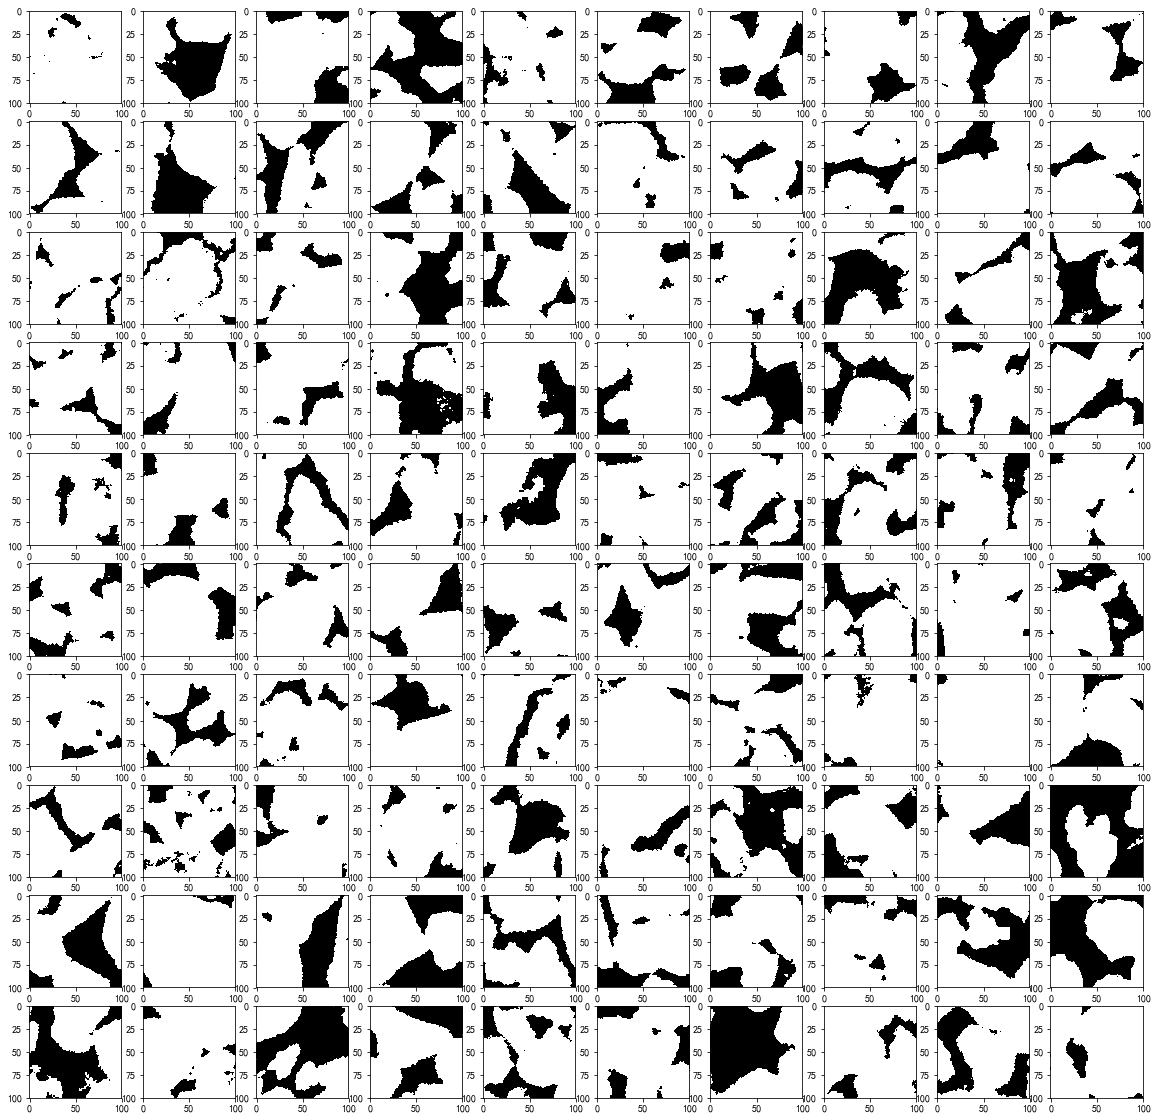

In [108]:
#分割图像样本
pic=img[:][:][0]
plt.figure(figsize=(20,20))
for i in range(0,10):
    for j in range(0,10):
        plt.subplot(10,10,j+i*10+1) 
        plt.imshow(pic[0+i*100:100+i*100,0+j*100:100+j*100],cmap=plt.cm.gray)
        #plt.axis('off') 
        #plt.title("CT扫描图0的分割图像"+str(i*10+j),fontsize=10,color='b')
plt.show()               

In [109]:
rock=[]
for num in range(0,1000):
    rock.append([])

In [110]:
np.shape(rock)

(1000, 0)

In [86]:
#分割的图像
#将分割的图像组成新的三维体
#例如将CT0到100图的X=0：100，Y=0：100的像素组成一个新的cube


In [111]:
for CT_num in range(0,1000):
    pic=img[:][:][CT_num]
    for i in range(0,10):
         for j in range(0,10):
                rock[j+i*10+int(CT_num/100)].append(pic[0+i*100:100+i*100,0+j*100:100+j*100])

In [112]:
rock[0][0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [113]:
rock[0][0].shape

(100, 100)

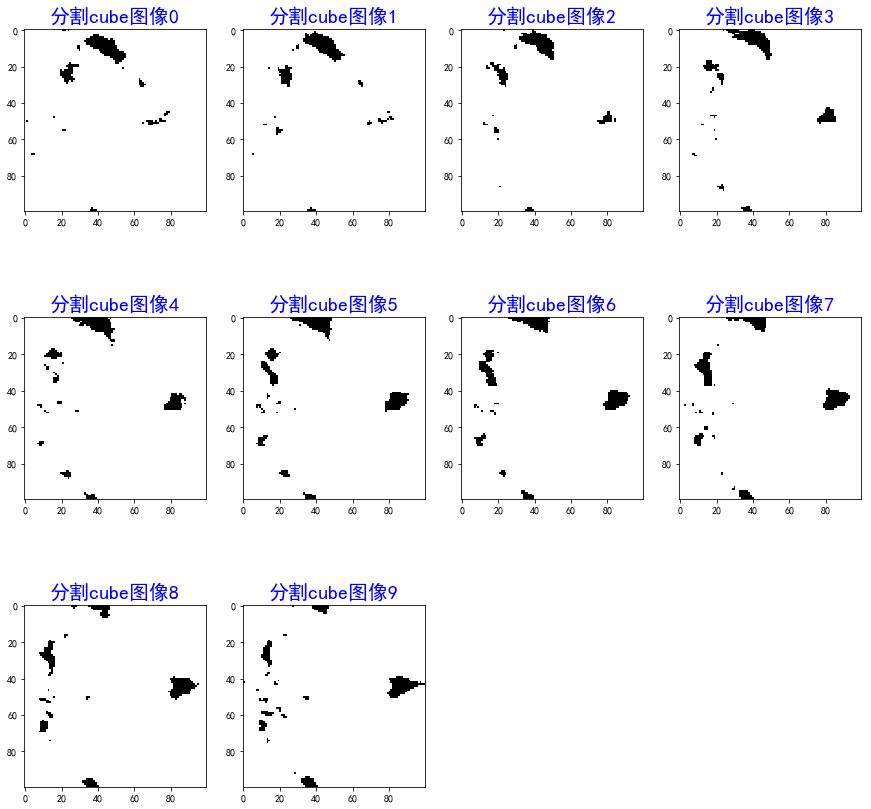

In [114]:
plt.figure(figsize=(15,15))
for i in range(0,10):
    plt.subplot(3,4,i+1)
    plt.imshow(rock[0][i],cmap=plt.cm.gray)
    plt.title("分割cube图像"+str(i),fontsize=20,color='b')
plt.show()

In [115]:
rock0=np.array(rock[0]).flatten()

In [116]:
rock0

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [117]:
rock0.shape

(1000000,)

In [105]:
import csv

In [119]:
num=0
filename='data'+str(num)+'.csv'
with open("C:/Users/Administrator/Desktop/Bentheimer_1000c_3p0035um/" + filename, "w", newline='') as csvfile:
    writer = csv.writer(csvfile)
    for j in range(len(rock0)):
        if rock0[j] == 1:
            value=1
        else:
            value=0
        writer.writerow([value])

In [123]:
from mpl_toolkits.mplot3d import Axes3D
import math

In [ ]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']

def plot_cube(num,N):
    num_x=int(num%N)
    num_y=int((num%math.pow(N,2))/N)
    num_z=int(num/math.pow(N,2))
    xx=np.linspace(num_x, num_x+1, 2)
    yy=np.linspace(num_y, num_y+1, 2)
    zz=np.linspace(num_z, num_z+1, 2)
    
    xx,yy=np.meshgrid(xx, yy)    
    z=np.zeros((1,1))
    z[0]=num_z
    ax.plot_surface(xx, yy, z ,color='b')
    ax.plot_surface(xx, yy, z+1,color='b')
    
    yy,zz = np.meshgrid(yy, zz)
    x=np.zeros((1,1))
    x[0]=num_x
    ax.plot_surface(x,yy,zz,color='b')
    ax.plot_surface(x+1,yy,zz,color='b')
    
    xx, zz = np.meshgrid(xx, zz)
    y=np.zeros((1,1))
    y[0]=num_y
    ax.plot_surface(xx,y,zz,color='b')
    ax.plot_surface(xx,y+1,zz,color='b')
    
    #ax.set_zlim(-2, 2)
    
#ata=pd.read_csv("C:/Users/Administrator/Desktop/sample_3_10.csv",encoding = "utf-8",header=None)
data=np.loadtxt("C:/Users/Administrator/Desktop/Bentheimer_1000c_3p0035um/data0.csv",delimiter=",",skiprows=0)
N=100
data2=[]
for i in range(0,N*N*N):
    if data[i]==1:
        data2.append(i)
fig= plt.figure()
ax = Axes3D(fig)

for i in range(N*N*N):
    if i in data2:
        plot_cube(i,N)
ax.set_zlim(0, 100)
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.show()
print('data_len',len(data2))